# Exploration

In [1]:
#importing libraries
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Should be version 3.6.9
from platform import python_version
print('Currently using Python',python_version())

Currently using Python 3.6.9


In [3]:
#path to the datafile
hdf5_path = 'data/dataset.hdf5'

#quick random samples for testing. Dictionary where key responds to demanded to hydro-label
samples = {13: 0, 
             8: 1, 
             2: 2, 
             0: 3, 
             1: 4, 
             10: 9, 
             3: 10, 
             12: 11, 
             4: 13, 
             6: 22, 
             14: 20, 
             15: 21, 
             9: 23, 
             11: 24, 
             5: 32, 
             7: 85}


In [4]:
def ReadFile(hdf5_path):
    '''
    reads in the hdf5-file and returns the training data-set and training labels
    '''
    with h5py.File(hdf5_path) as file:
        train_sample = file['train_data'][:,:,:,:,:]
        hydro_value = file['train_labels']
        return train_sample, hydro_value

    
def GetRandomSamples(samples):
    '''
    returns the requested amount of random samples
    '''
    
    with h5py.File(hdf5_path) as file:
        train_labels = file['train_labels'][:]
    
    return train_labels[np.random.randint(low=0,high=train_labels.size,size=samples)]
        
        
def GetHydroSamples(hydro,samples):
    '''
    returns random amount of samples with the demanded hydro-label in a numpy array
    '''
    
    with h5py.File(hdf5_path) as file:
        train_labels = file['train_labels'][:]
        train_labels = np.where(train_labels == hydro)[0]

    return train_labels[np.random.randint(low=0, high=train_labels.size, size=samples)]

In [5]:
def TwoDimHeatmap(data,z,c,**kwargs):
    '''
    2D-heatmap in the X,Y-plane of the defined channel and Z-coordinate.
    '''
    data = data[:,:,z,c]
    if 'ax' not in kwargs.keys():
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        ax = kwargs['ax']
        
    ax.set_title('z='+str(z)+',channel='+str(c))
    ax.imshow(data)
    
def AnalyseSimulation(sample,z,c=1,subtraction=False,histogram=False):
    '''
    Does an entire analysis of a simulation in the z-plane
    '''
    #read in the data
    with h5py.File(hdf5_path) as file:
        train_sample = file['train_data'][sample,:,:,:,:]
        hydro_value = file['train_labels'][sample]

    print('> HYDRATION LEVEL: ',hydro_value)    
    #make the 3 different axis for the channels
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
    axes = (ax1,ax2,ax3)
    
    #iterate over the axes and plot a channel on them
    for x,y in enumerate(axes):
        TwoDimHeatmap(train_sample,z,x,ax=y)
    plt.show()
    
    #plotting the subtractions. Can be turned on if requested
    if subtraction:
        for channel in range(3):
            print('> DIFFERENCE BETWEEN Z AND Z+1, CHANNEL' , channel)
            fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
            TwoDimHeatmap(train_sample,z,1,ax=ax1)
            TwoDimHeatmap(train_sample,z+1,1,ax=ax2)

            ax3.imshow(np.absolute(np.subtract(train_sample[:,:,z,channel],train_sample[:,:,z+1,channel])))

            ax1.set_title(str('z='+str(z)+',channel=')+str(channel))
            ax2.set_title('z='+str(z+1)+',channel='+str(channel))
            ax3.set_title('subtraction & abs. value')

            plt.show()
    
    #plotting histograms. Can be turned on if requested
    if histogram:
        print('> COUNTING VALUES IN DIFFERENT CHANNELS')
        fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
        axes = (ax1,ax2,ax3)
        for x,ax in enumerate(axes):
            arr = train_sample[:,:,:,x].flatten()
            minim = arr.min()
            maxim = arr.max()
            ticks = np.linspace(minim,maxim,10)

            ax.grid(True)
            ax.set_title('channel '+str(x))
            ax.set_xticks(ticks)
            ax.tick_params(axis ='x', rotation = 45)
            ax.set_xlabel('values')
            ax.set_ylabel('counts')
            ax.hist(arr)
        plt.tight_layout()
        plt.show()
        
def MultipleAnalysis(hydro,samps):
    '''
    Do full analysis on random subset of demanded hydro-level.    
    '''
    test = GetHydroSamples(hydro,samps)
    for sample in test:
        print('> SAMPLE NUMBER: ',sample)
        AnalyseSimulation(sample,15)

> HYDRATION LEVEL:  8


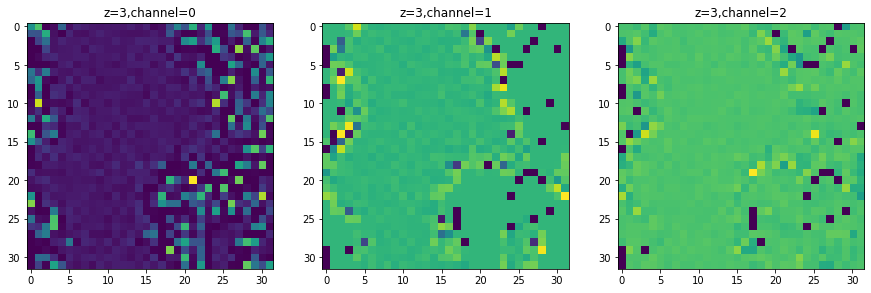

In [6]:
AnalyseSimulation(1000,3,1)

> SAMPLE NUMBER:  2313
> HYDRATION LEVEL:  8


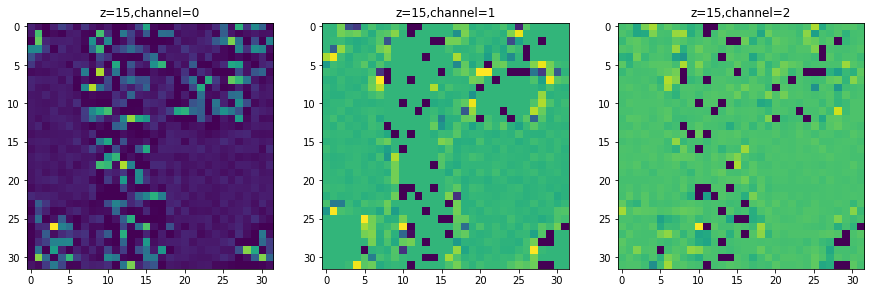

> SAMPLE NUMBER:  19798
> HYDRATION LEVEL:  8


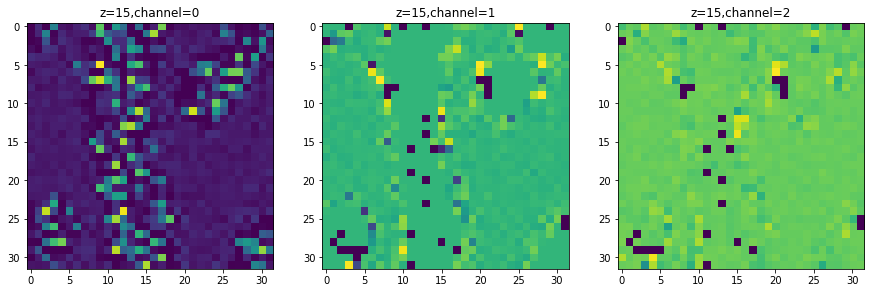

> SAMPLE NUMBER:  13122
> HYDRATION LEVEL:  8


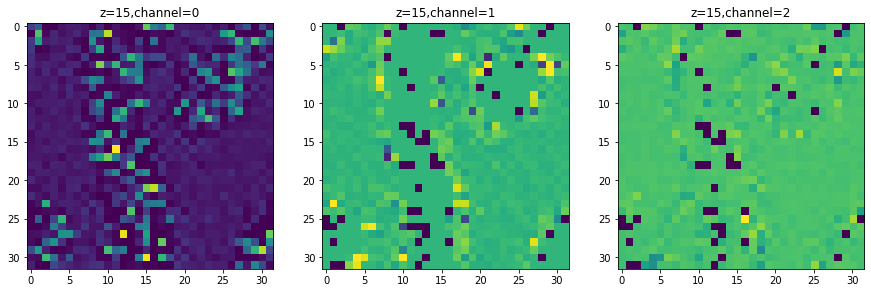

> SAMPLE NUMBER:  18802
> HYDRATION LEVEL:  8


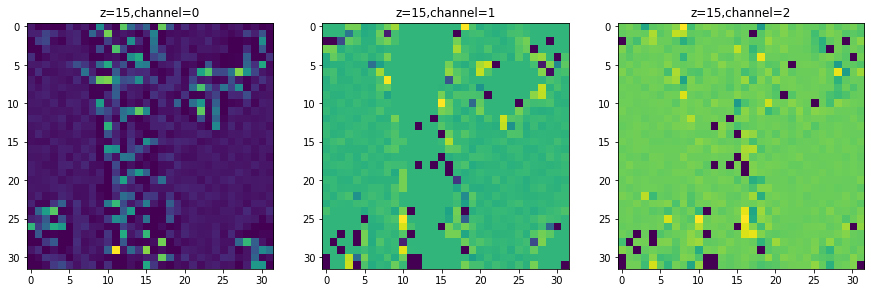

> SAMPLE NUMBER:  20963
> HYDRATION LEVEL:  8


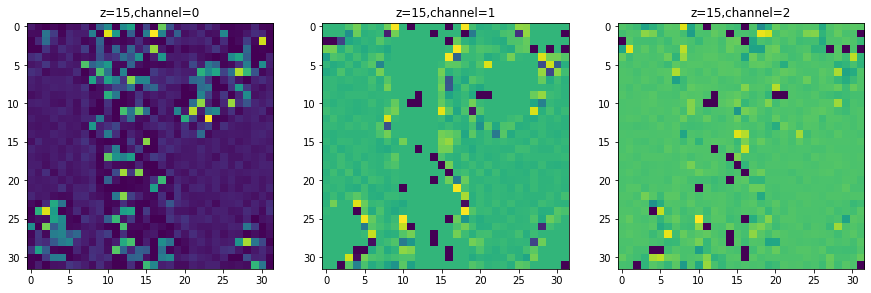

> SAMPLE NUMBER:  15049
> HYDRATION LEVEL:  8


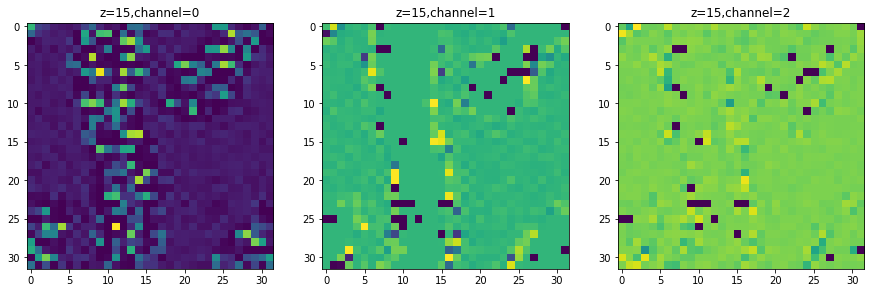

> SAMPLE NUMBER:  20114
> HYDRATION LEVEL:  8


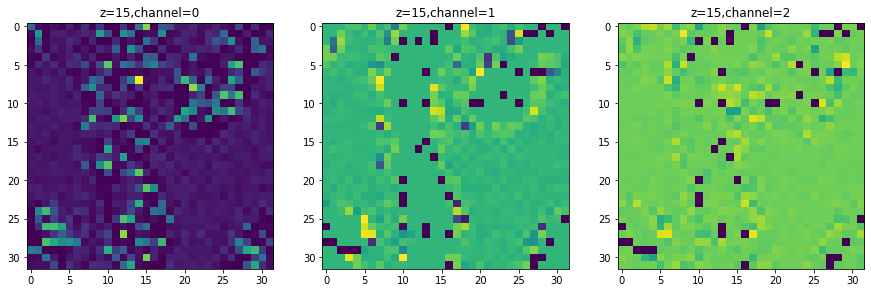

> SAMPLE NUMBER:  24589
> HYDRATION LEVEL:  8


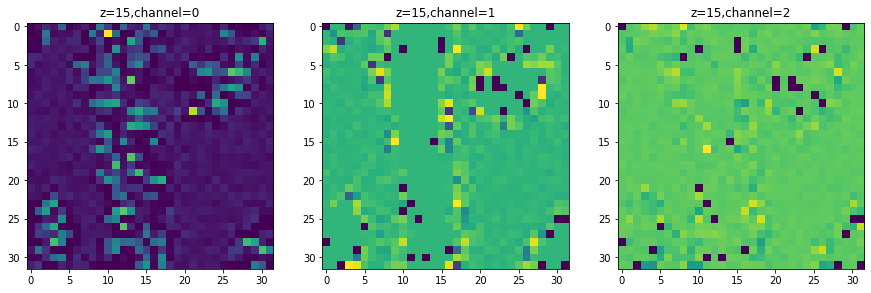

> SAMPLE NUMBER:  21409
> HYDRATION LEVEL:  8


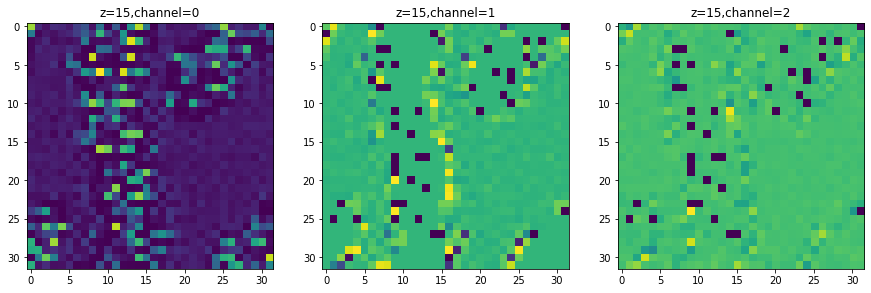

> SAMPLE NUMBER:  21634
> HYDRATION LEVEL:  8


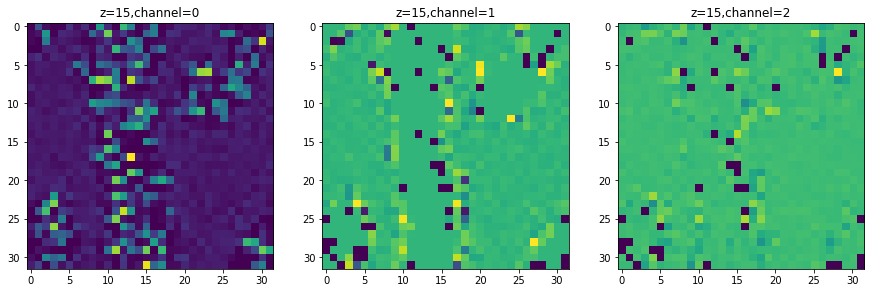

> SAMPLE NUMBER:  5517
> HYDRATION LEVEL:  8


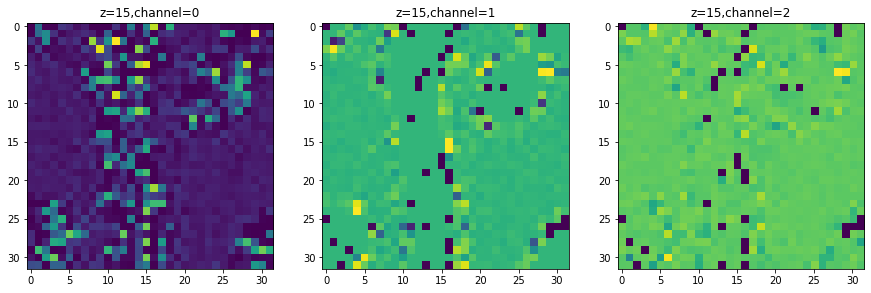

> SAMPLE NUMBER:  19044
> HYDRATION LEVEL:  8


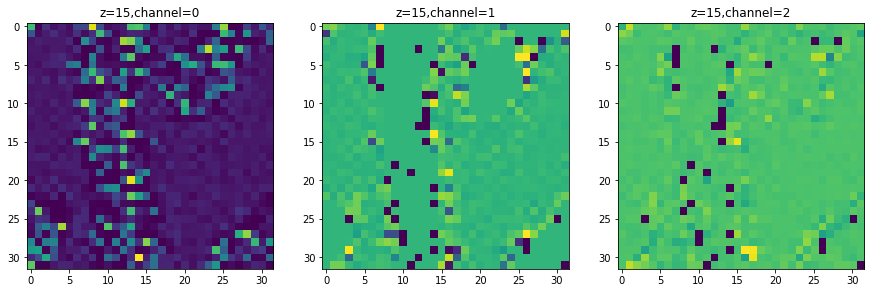

> SAMPLE NUMBER:  12736
> HYDRATION LEVEL:  8


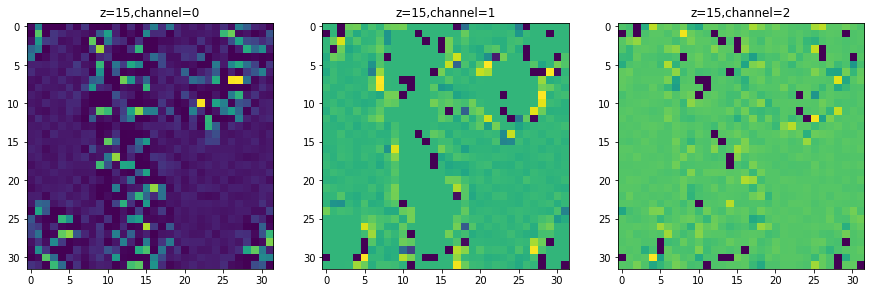

> SAMPLE NUMBER:  24849
> HYDRATION LEVEL:  8


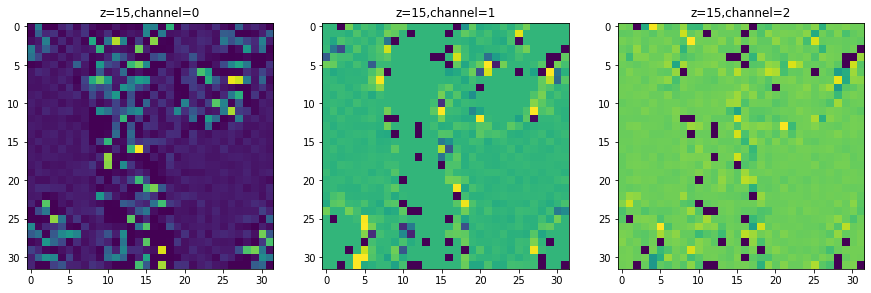

> SAMPLE NUMBER:  22237
> HYDRATION LEVEL:  8


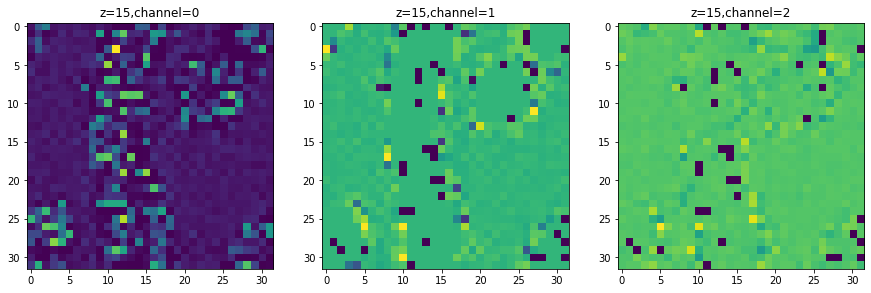

> SAMPLE NUMBER:  20052
> HYDRATION LEVEL:  8


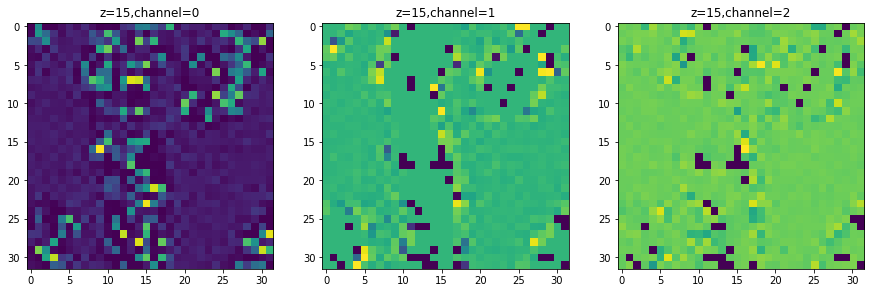

> SAMPLE NUMBER:  5025
> HYDRATION LEVEL:  8


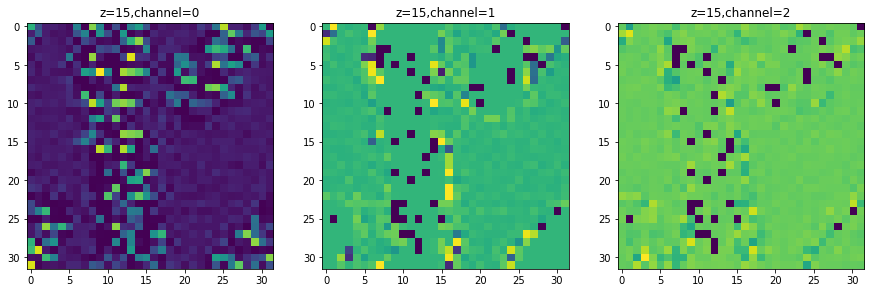

> SAMPLE NUMBER:  8793
> HYDRATION LEVEL:  8


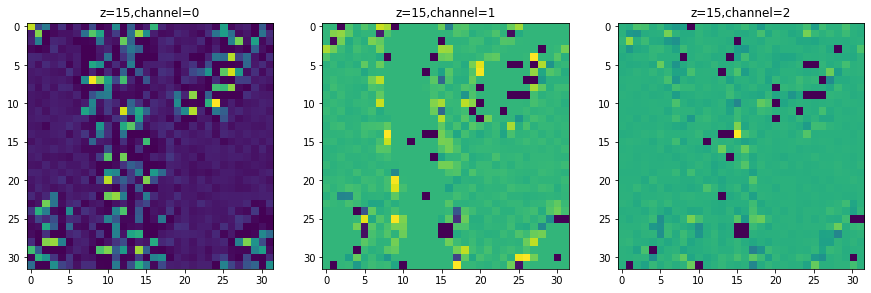

> SAMPLE NUMBER:  16458
> HYDRATION LEVEL:  8


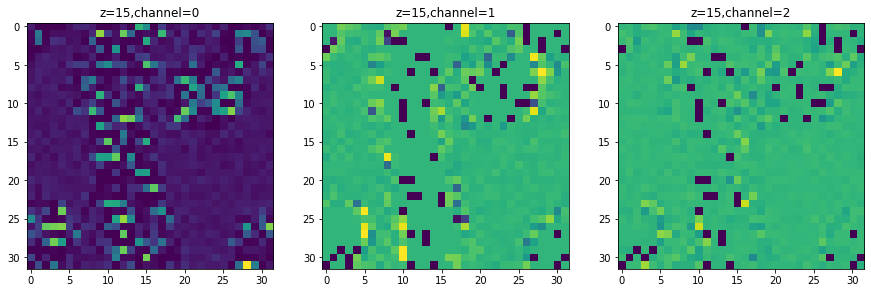

> SAMPLE NUMBER:  21422
> HYDRATION LEVEL:  8


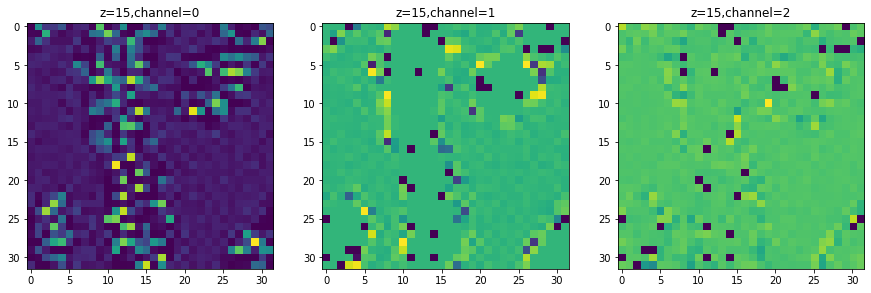

> SAMPLE NUMBER:  21937
> HYDRATION LEVEL:  8


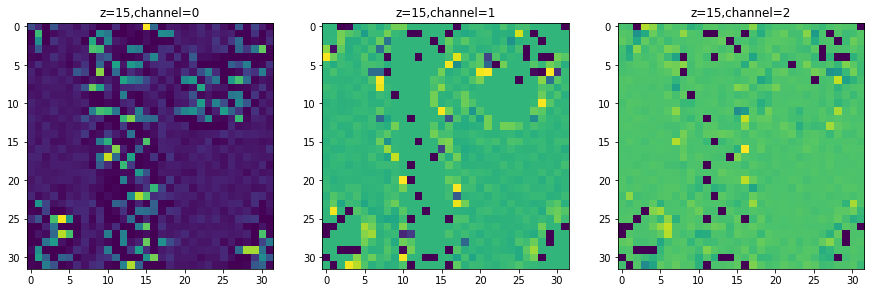

> SAMPLE NUMBER:  18885
> HYDRATION LEVEL:  8


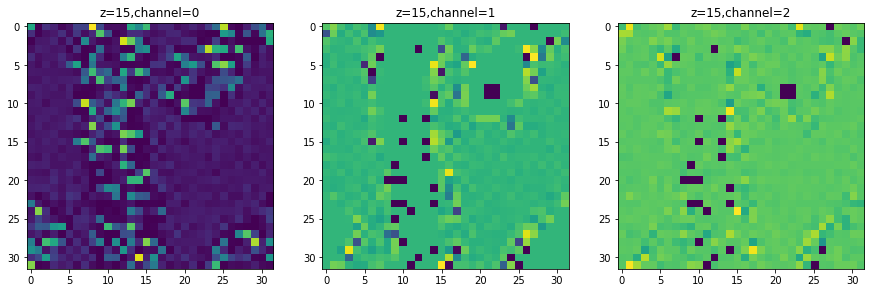

> SAMPLE NUMBER:  15845
> HYDRATION LEVEL:  8


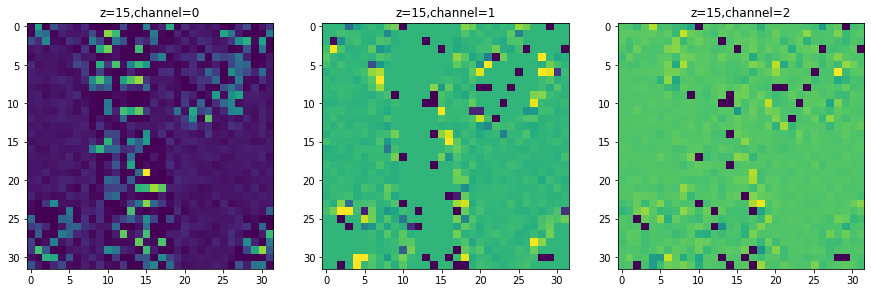

> SAMPLE NUMBER:  23306
> HYDRATION LEVEL:  8


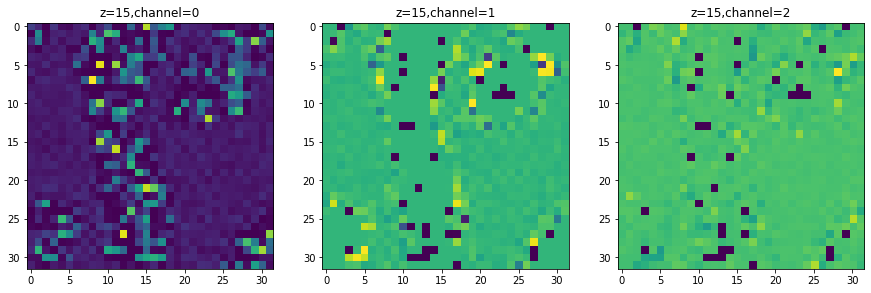

> SAMPLE NUMBER:  3215
> HYDRATION LEVEL:  8


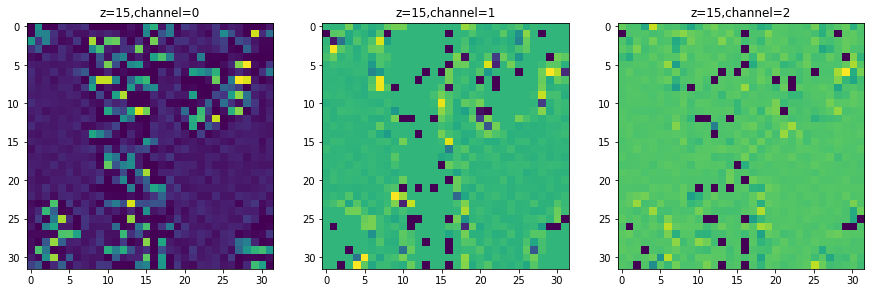

> SAMPLE NUMBER:  16031
> HYDRATION LEVEL:  8


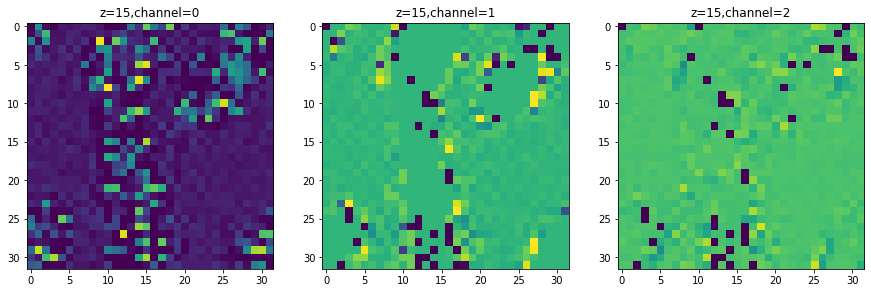

> SAMPLE NUMBER:  17203
> HYDRATION LEVEL:  8


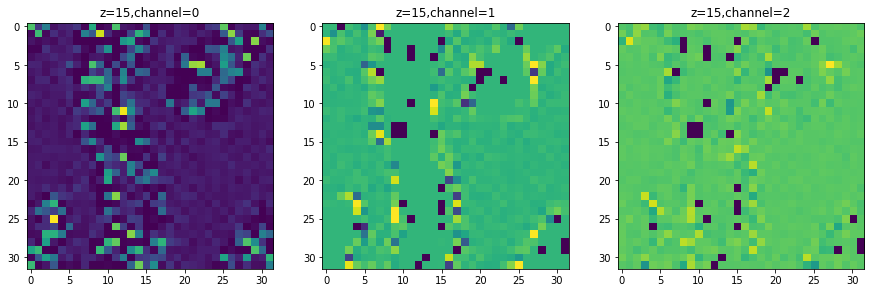

> SAMPLE NUMBER:  8620
> HYDRATION LEVEL:  8


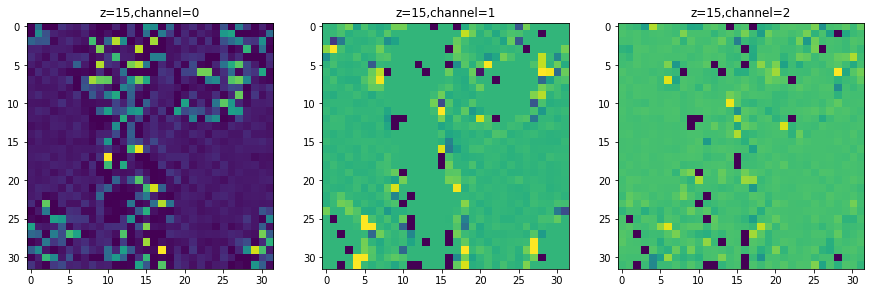

> SAMPLE NUMBER:  16216
> HYDRATION LEVEL:  8


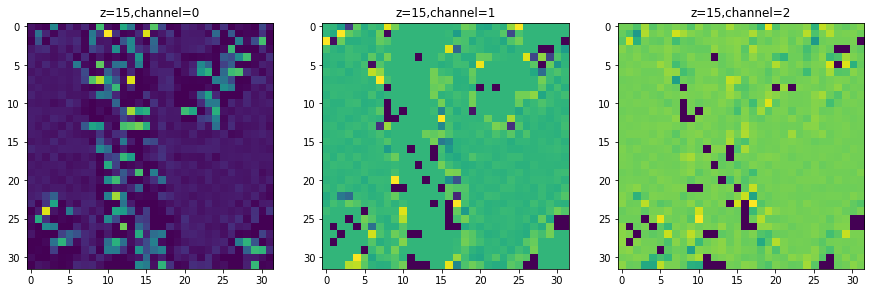

> SAMPLE NUMBER:  23939
> HYDRATION LEVEL:  8


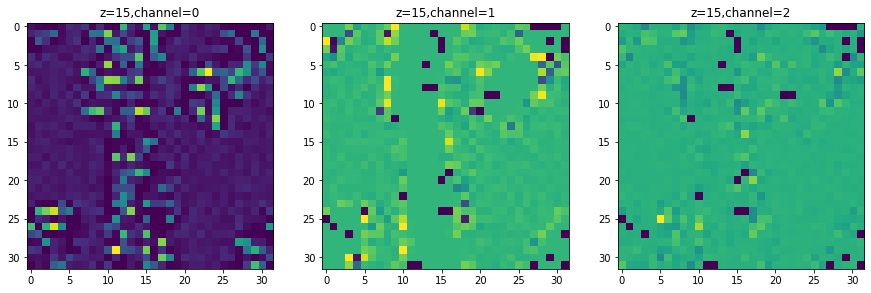

In [7]:
MultipleAnalysis(8,30)